In [1]:
from OrbitCOM import OrbitCOM 

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


In [2]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
MW = OrbitCOM("MW", 0, 800, 5)
M31 = OrbitCOM("M31", 0, 800, 5)
M33 = OrbitCOM("M33", 0, 800, 5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500


In [3]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MW_COM = np.genfromtxt("Orbit_MW.txt",dtype=None,names=True)
M31_COM = np.genfromtxt("Orbit_M31.txt",dtype=None,names=True)
M33_COM = np.genfromtxt("Orbit_M33.txt",dtype=None,names=True)


In [4]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def relMagnitude(a,b): 
    """Function to compute the magnitude of the difference between two vectors. 
    Input: 
        a: 'np.array'
            vector 1
        b: 'np.array'
            vector 2
    Output: 
        magnitude of the difference between two vectors
    """
    
    if a.size == b.size : 
        rel = a - b
        mag = np.sqrt( rel[0]**2 + rel[1]**2 + rel[2]**2 )
    else: 
        raise TypeError("Two vector have different dimesions")
    
    return mag

In [5]:
# Determine the magnitude of the relative position and velocities 
ind = MW_COM.size

# make empty array
separation_MW_M31 = []
relativevel_MW_M31 = []

separation_M33_M31 = []
relativevel_M33_M31 = []

for i in range(ind):
    
#   store position vectors of all galaxies
    MW_pos_vec = np.array([MW_COM[i]['x'], MW_COM[i]['y'], MW_COM[i]['z']])
    M31_pos_vec = np.array([M31_COM[i]['x'], M31_COM[i]['y'], M31_COM[i]['z']])
    M33_pos_vec = np.array([M33_COM[i]['x'], M33_COM[i]['y'], M33_COM[i]['z']])
    
#   store velocity vectors of all galaxies
    MW_vel_vec = np.array([MW_COM[i]['vx'], MW_COM[i]['vy'], MW_COM[i]['vz']])
    M31_vel_vec = np.array([M31_COM[i]['vx'], M31_COM[i]['vy'], M31_COM[i]['vz']])
    M33_vel_vec = np.array([M33_COM[i]['vx'], M33_COM[i]['vy'], MW_COM[i]['vz']])
    
    
# of MW and M31
   
    separation_MW_M31.append( relMagnitude( MW_pos_vec , M31_pos_vec) ) 
    relativevel_MW_M31.append( relMagnitude( MW_vel_vec, M31_vel_vec) ) 
    
# of M33 and M31

    separation_M33_M31.append(  relMagnitude( M33_pos_vec, M31_pos_vec)  ) 
    relativevel_M33_M31.append( relMagnitude( M33_vel_vec, M31_vel_vec)  ) 
    # print(MW_COM[i]['t'])

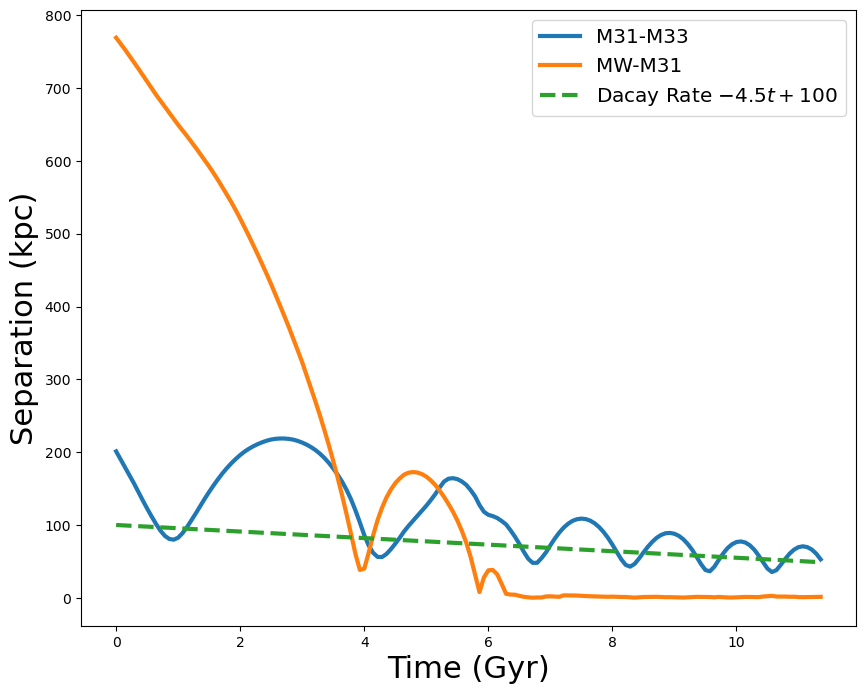

In [26]:
# Plot the Orbit of the galaxies 
#################################
time = MW_COM['t']

fig,ax = plt.subplots(figsize=(10,8))

plt.plot(time, separation_M33_M31,
         linewidth = 3, label='M31-M33')
plt.plot(time, separation_MW_M31,
         linewidth = 3, label='MW-M31')
plt.plot(time, time*(-4.5) + 100, '--', lw=3, label=r'Dacay Rate $-4.5t+100$')
    
# Axes labels 
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Separation (kpc)', fontsize=22)

# Legend
plt.legend(loc='upper right',fontsize='x-large')

# save the file 
plt.savefig('Separation.png')



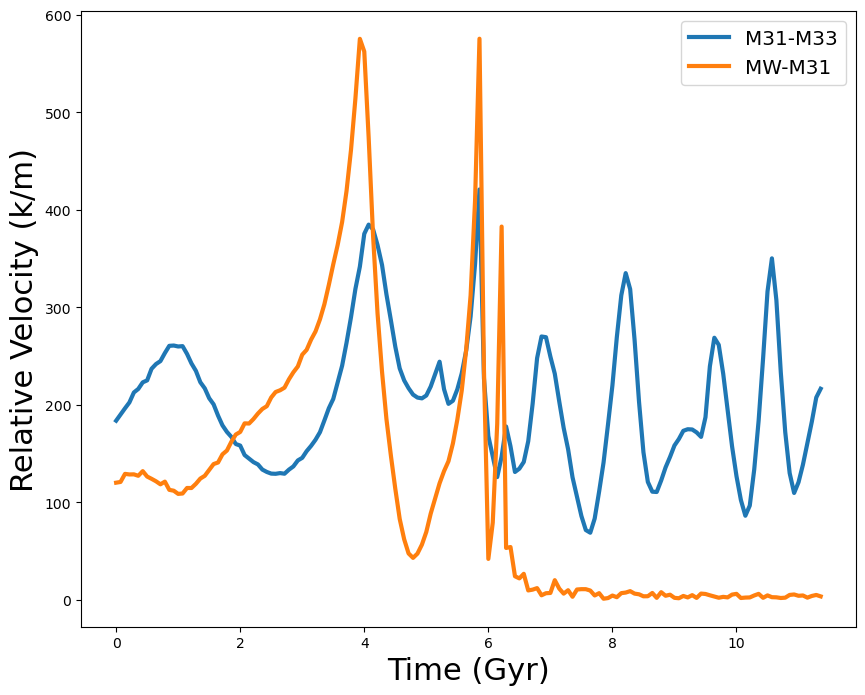

In [19]:
# Plot the Orbit of the galaxies 
#################################
time = MW_COM['t']

fig,ax = plt.subplots(figsize=(10,8))

plt.plot(time, relativevel_M33_M31,
         linewidth = 3, label='M31-M33')
plt.plot(time, relativevel_MW_M31,
         linewidth = 3, label='MW-M31')

# Axes labels 
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Relative Velocity (k/m)', fontsize=22)

# Legend
plt.legend(loc='upper right',fontsize='x-large')

# save the file 
plt.savefig('RelativeVelocity.png')



## Questions

1. How many close encounters will the MW and M31 experience in the future?

twice. 4Gyr and 5.9 Gyr. 

2. How is the time evolution of the separation and relative velocity related?


The smaller the separation, the faster the relative velocity. 
It make sense because as Galaxies approaches closer to each other, they enter deep potential field, and feel stronger force. 

3. When do M31 and the MW merge? (you might need to zoom in on the plot - try a log
y axis). What happens to M33’s orbit when they merge?

In 6.1 Gyrs. M33 orbit around MW-M31 combined system. Orbit decay slowly. 

4. BONUS: what is roughly the decay rate of M33’s orbit after 6 Gyr (ratio of the differ-
ence between two successive apocenters and the orbital period; you don’t need to be
precise). If this rate is constant, how long will it take M33 to merge with the combined
MW+M31 remnant if it is at a distance of 75 kpc?

Dacay rate of M33's orbit is 4.5 kpc/Gyr.

In [31]:
print(np.round(75/4.5,1))

16.7


It will merge in 16.7 Gyr after M31 and MW merge. 